# 사이킷런을 이용한 붓꽃 데이터셋 로드

* 클래스 레이블 : 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [0, 2]]      # 컬럼0(꽃받침 길이)과 컬럼2(꽃잎 길이) 값을 가지고 옴
y = iris.target               # 정답값(꽃종류) 을 가지고 옴

In [2]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


* 데이터셋을 학습셋과 테스트셋으로 분할함:

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=1, stratify=y)
# test_size : 전체 샘플에서 지정한 비율 만큼을 테스트 셋으로 분할함
# stratify : 각 분할 셋의 클래스 분포 비가 지정한 셋과 동일하도록 함 

In [5]:
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [25 25 25]
y_test의 레이블 카운트: [25 25 25]


In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

* 각 특성값을 표준화:

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## 사이킷런으로 로지스틱회귀 모델 사용하기

In [20]:
#사이킷 런 패키지를 활용하여 multi-classification 코드를 작성
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(max_iter=1000)
model.fit(X_train_std, y_train)
y_pred = model.predict(X_train_std)

C:\Users\infosec\AppData\Local\Temp\ipykernel_15368\4125005180.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


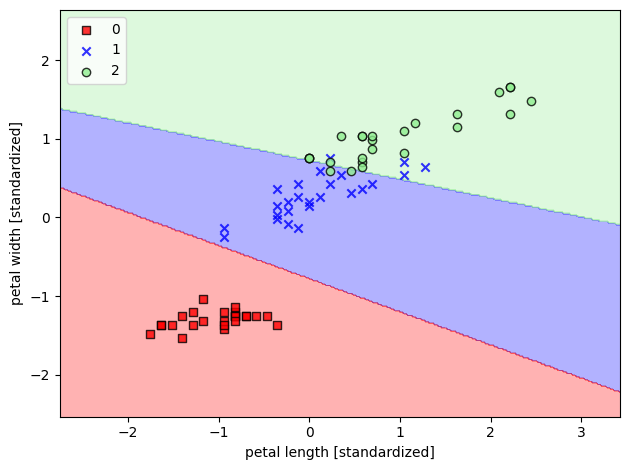

In [10]:
#classifier에 위에서 자신이 작성한 모델 이름을 넣으면 작동
plot_decision_regions(X_train_std, y_train,
                      classifier=model)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [18]:
#plot_confusion_matrix 함수 안에 lr 대신 자신이 작성한 모델 이름을 넣으면 작동
from sklearn.metrics import plot_confusion_matrix

# import some data to play with
class_names = iris.target_names

plot_confusion_matrix(model, X_test_std, y_test,
                          display_labels=class_names,
                          cmap=plt.cm.Blues,
                          normalize='true')

plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\infosec\anaconda3\envs\gpu-tf\lib\site-packages\sklearn\metrics\__init__.py)

In [23]:
import sklearn
sklearn.__version__

'1.3.2'

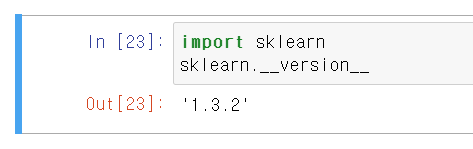

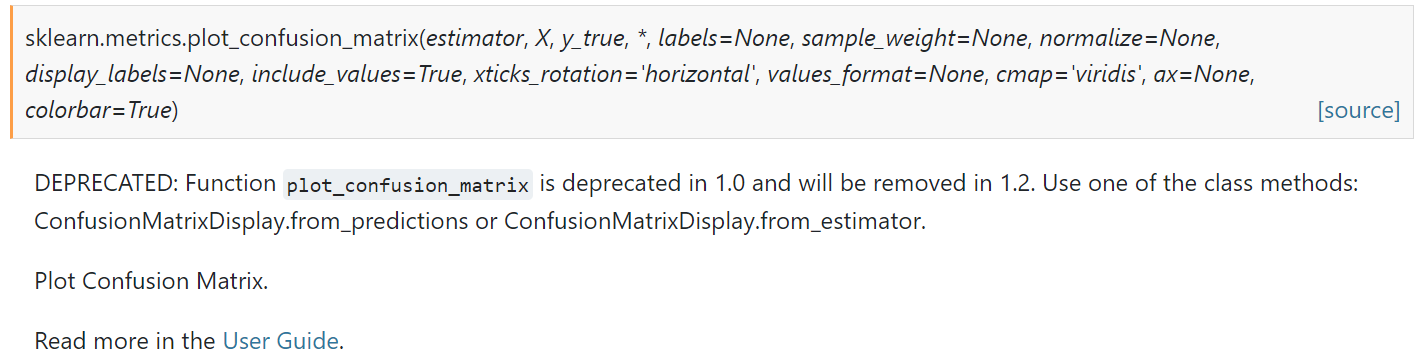

# 해당 함수는 1.2 버전부터 더이상 지원하지 않습니다

# 제 sklearn 버전이 1.3.2 라서 해당 함수가 더이상 지원되지 않습니다.

# 다른 함수를 사용해 구현했습니다

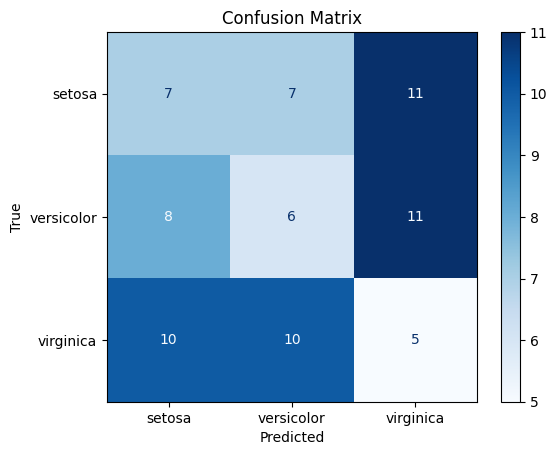

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# 가정: y_pred와 y_test가 정의되어 있다고 가정합니다.
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = iris.target_names
# ConfusionMatrixDisplay를 사용하여 히트맵 플로팅
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()